# Imports

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

import ast

import warnings
warnings.filterwarnings("ignore")

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

import sklearn.model_selection as ms
import sklearn.preprocessing as preprocess
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


from langdetect import detect
import pyarabic.araby as araby

import gensim
import re


import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier


In [9]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/youssef/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/youssef/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/youssef/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/youssef/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/youssef/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[

[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /home/youssef/nltk_data...
[nltk_data]    |   Unzipping corpora/paradigms.zip.
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /home/youssef/nltk_data...
[nltk_data]    |   Unzipping corpora/pe08.zip.
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /home/youssef/nltk_data...
[nltk_data]    |   Unzipping misc/perluniprops.zip.
[nltk_data]    | Downloading package pil to /home/youssef/nltk_data...
[nltk_data]    |   Unzipping corpora/pil.zip.
[nltk_data]    | Downloading package pl196x to
[nltk_data]    |     /home/youssef/nltk_data...
[nltk_data]    |   Unzipping corpora/pl196x.zip.
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     /home/youssef/nltk_data...
[nltk_data]    |   Unzipping stemmers/porter_test.zip.
[nltk_data]    | Downloading package ppattach to
[nltk_data]    |     /home/youssef/nltk_data...
[nltk_data]    |   Unzipping corpora/ppattac

True

# Rename Labels into -1, 0, and 1

In [2]:
df = pd.read_csv('ar_reviews_100k.csv')
df["label"]=df["label"].str.replace("Positive","1")
df["label"]=df["label"].str.replace("Mixed","0")
df["label"]=df["label"].str.replace("Negative","-1")
df

,label,text
0,1,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,1,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,1,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,1,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,1,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
...,...,...
99994,-1,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...
99995,-1,لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...
99996,-1,كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...
99997,-1,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...


# Detect Language, Strip Tashkeel and Tatweel

In [4]:
#df["stripped"]= df["text"].apply(araby.strip_tashkeel)
#df["stripped"]= df["text"].apply(araby.strip_tatweel)
#df["stripped"]= df["stripped"].apply(araby.normalize_hamza)

In [3]:
#the following rows don't contain arabic words. 
#We remove them manually instead of running the detection function to skip the overhead.
df.drop(3539,inplace=True)
df.drop(51456,inplace=True)

In [5]:
for index,row in df.iterrows():
    try:
        language = detect(row[1])
        if language != 'ar':
          row["text"]="-1"
    except:
        language = "error"
        print("Row ",index," does not contain Arabic words and will be removed")
        row["text"]="-1"
        #print(row["text"])

df = df[df['text']!="-1"] #remove non-arabic text
#df.info()

Row  3539  does not contain Arabic words and will be removed
Row  51456  does not contain Arabic words and will be removed


In [4]:
df

,label,text
0,1,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,1,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,1,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,1,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,1,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
...,...,...
99994,-1,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...
99995,-1,لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...
99996,-1,كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...
99997,-1,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...


# Remove Stopwords

In [5]:
def get_unique(df,colname):
  sentences_arr=df[colname].to_numpy() #convert df to np array
  words=' '.join(sentences_arr).split(' ') # join all strings into one string then splitting to get the words
  words=np.array(words) #convert to np array
  unique,counts = np.unique(words,return_counts=True)
  return unique, counts


def get_unique_dict(unique,counts):
  unique_dict=dict(zip(unique,counts))
  unique_dict=dict(sorted(unique_dict.items(), key=lambda item: item[1],reverse=True))
  return unique_dict

def remove_redundant_words(unique_dict):
  stop_words=['أو','التي','أن','من','على','عن','في','فى','و','ان','هذا','او','كتب','...','.','','الى','فيه','انه','قبل','//','..','،',':',"؟",'/']
  for k, v in list(unique_dict.items()):
      if(unique_dict[k]<100 or k in stop_words):
        del unique_dict[k]

  return unique_dict


def remove_useless_words(sentence):
  res=[]
  for word in word_tokenize(sentence):
    if word in unique_dict:
      res.append(word)
  return res

In [6]:
unique,counts=get_unique(df,"text")
unique_dict=get_unique_dict(unique,counts)
unique_dict=remove_redundant_words(unique_dict)
unique_dict

{'لا': 46153,
 'ما': 34929,
 'لم': 28206,
 'جدا': 27783,
 'كل': 24341,
 'كان': 23626,
 'الكتاب': 22891,
 'الرواية': 22110,
 'مع': 18433,
 'هو': 17270,
 'غير': 16367,
 'الفندق': 16022,
 'كانت': 14204,
 'إلى': 14081,
 'لكن': 13714,
 'هذه': 13491,
 'الذي': 13199,
 'ولا': 12611,
 'الكاتب': 11743,
 'بعد': 11386,
 'كتاب': 10973,
 'بعض': 10709,
 'بين': 10458,
 'حتى': 10293,
 'رواية': 10291,
 'فيها': 10057,
 'الله': 9511,
 'هي': 8897,
 'ولكن': 8781,
 'بس': 8729,
 'مش': 8585,
 'ذلك': 8536,
 'كنت': 8471,
 'اللي': 7694,
 'كما': 7631,
 'علي': 7466,
 'قد': 7025,
 'الغرف': 6843,
 'لو': 6829,
 'به': 6787,
 'جيد': 6673,
 'بشكل': 6645,
 'فقط': 6578,
 'ليس': 6568,
 'الاستقبال': 6538,
 'له': 6412,
 'أكثر': 6370,
 'يوجد': 6215,
 'بها': 6169,
 'إلا': 6072,
 'يكون': 5893,
 'فندق': 5732,
 'لي': 5718,
 'إن': 5502,
 'حيث': 5413,
 'أنه': 5315,
 'هناك': 5309,
 'عدم': 5275,
 'تلك': 5235,
 'ثم': 5162,
 'الموقع': 5138,
 'الا': 5024,
 'انا': 4957,
 'ف': 4913,
 'شيء': 4872,
 'رائع': 4786,
 'عند': 4782,
 'عليه': 4768,

In [7]:
df["text"]=df["text"].apply(remove_useless_words)
df

,label,text
0,1,"[ممتاز, نوعا, ما, النظافة, والموقع, المطعم]"
1,1,"[أحد, أسباب, نجاح, كل, شخص, هذه, الدولة, نحن, ..."
2,1,"[القاهرة, هدوء, حقيقة, ما, تلك, البلاد, بحق, ا..."
3,1,"[مبدئيا, اللي, زي, الفيل, الازرق, احسن, احمد, ..."
4,1,"[جزء, لا, دبي, فندق, متكامل, الخدمات, مريح, نف..."
...,...,...
99994,-1,"[معرفش, ليه, كنت, أكملها, وهي, مش, البداية, ال..."
99995,-1,"[لا, يستحق, يكون, بوكنق, لانه, سيئ, لا, شي, لا..."
99996,-1,"[كتاب, ضعيف, جدا, ولم, استمتع, به, كل, قصه, سر..."
99997,-1,"[مملة, جدا, محمد, حسن, علوان, والوصف, دقيق, حد..."


In [8]:
#backing up dataframe
df_copy=df.copy()
df_copy

,label,text
0,1,"[ممتاز, نوعا, ما, النظافة, والموقع, المطعم]"
1,1,"[أحد, أسباب, نجاح, كل, شخص, هذه, الدولة, نحن, ..."
2,1,"[القاهرة, هدوء, حقيقة, ما, تلك, البلاد, بحق, ا..."
3,1,"[مبدئيا, اللي, زي, الفيل, الازرق, احسن, احمد, ..."
4,1,"[جزء, لا, دبي, فندق, متكامل, الخدمات, مريح, نف..."
...,...,...
99994,-1,"[معرفش, ليه, كنت, أكملها, وهي, مش, البداية, ال..."
99995,-1,"[لا, يستحق, يكون, بوكنق, لانه, سيئ, لا, شي, لا..."
99996,-1,"[كتاب, ضعيف, جدا, ولم, استمتع, به, كل, قصه, سر..."
99997,-1,"[مملة, جدا, محمد, حسن, علوان, والوصف, دقيق, حد..."


# Frequency Encoding and TF-IDF

In [9]:
def get_freq(words):
  freq=dict()
  for word in words:
      if word in freq:
        freq[word]+=1
      else:
        freq[word]=1
  return freq

In [20]:
df["freq"]=df["text"].apply(get_freq)
df

,label,text,freq
0,1,"[ممتاز, نوعا, ما, النظافة, والموقع, المطعم]","{'ممتاز': 1, 'نوعا': 1, 'ما': 1, 'النظافة': 1,..."
1,1,"[أحد, أسباب, نجاح, كل, شخص, هذه, الدولة, نحن, ...","{'أحد': 1, 'أسباب': 1, 'نجاح': 1, 'كل': 2, 'شخ..."
2,1,"[القاهرة, هدوء, حقيقة, ما, تلك, البلاد, بحق, ا...","{'القاهرة': 1, 'هدوء': 1, 'حقيقة': 1, 'ما': 1,..."
3,1,"[مبدئيا, اللي, زي, الفيل, الازرق, احسن, احمد, ...","{'مبدئيا': 1, 'اللي': 1, 'زي': 2, 'الفيل': 1, ..."
4,1,"[جزء, لا, دبي, فندق, متكامل, الخدمات, مريح, نف...","{'جزء': 1, 'لا': 2, 'دبي': 1, 'فندق': 1, 'متكا..."
...,...,...,...
99638,-1,"[معرفش, ليه, كنت, أكملها, وهي, مش, البداية, ال...","{'معرفش': 1, 'ليه': 1, 'كنت': 1, 'أكملها': 1, ..."
99639,-1,"[لا, يستحق, يكون, بوكنق, لانه, سيئ, لا, شي, لا...","{'لا': 3, 'يستحق': 1, 'يكون': 1, 'بوكنق': 1, '..."
99640,-1,"[كتاب, ضعيف, جدا, ولم, استمتع, به, كل, قصه, سر...","{'كتاب': 1, 'ضعيف': 1, 'جدا': 1, 'ولم': 1, 'اس..."
99641,-1,"[مملة, جدا, محمد, حسن, علوان, والوصف, دقيق, حد...","{'مملة': 1, 'جدا': 1, 'محمد': 1, 'حسن': 1, 'عل..."


In [55]:
#converting string dict to dict
#df['freq']=df['freq'].apply(lambda x: ast.literal_eval(x))
#print(type(df.head()["freq"][0]))
#df

In [14]:
#joined words into a sentence again to use sklearn model
df["joined_text"]=df["freq"].apply(lambda freq_dict: ' '.join(list(freq_dict.keys())) )
df

,label,text,freq,joined_text
0,1,"[ممتاز, نوعا, ما, النظافة, والموقع, المطعم]","{'ممتاز': 1, 'نوعا': 1, 'ما': 1, 'النظافة': 1,...",ممتاز نوعا ما النظافة والموقع المطعم
1,1,"[أحد, أسباب, نجاح, كل, شخص, هذه, الدولة, نحن, ...","{'أحد': 1, 'أسباب': 1, 'نجاح': 1, 'كل': 2, 'شخ...",أحد أسباب نجاح كل شخص هذه الدولة نحن نحب فكر ن...
2,1,"[القاهرة, هدوء, حقيقة, ما, تلك, البلاد, بحق, ا...","{'القاهرة': 1, 'هدوء': 1, 'حقيقة': 1, 'ما': 1,...",القاهرة هدوء حقيقة ما تلك البلاد بحق المسلمين ...
3,1,"[مبدئيا, اللي, زي, الفيل, الازرق, احسن, احمد, ...","{'مبدئيا': 1, 'اللي': 1, 'زي': 2, 'الفيل': 1, ...",مبدئيا اللي زي الفيل الازرق احسن احمد مراد مرح...
4,1,"[جزء, لا, دبي, فندق, متكامل, الخدمات, مريح, نف...","{'جزء': 1, 'لا': 2, 'دبي': 1, 'فندق': 1, 'متكا...",جزء لا دبي فندق متكامل الخدمات مريح نفسيا يوجد
...,...,...,...,...
99994,-1,"[معرفش, ليه, كنت, أكملها, وهي, مش, البداية, ال...","{'معرفش': 1, 'ليه': 1, 'كنت': 1, 'أكملها': 1, ...",معرفش ليه كنت أكملها وهي مش البداية القصة الاح...
99995,-1,"[لا, يستحق, يكون, بوكنق, لانه, سيئ, لا, شي, لا...","{'لا': 3, 'يستحق': 1, 'يكون': 1, 'بوكنق': 1, '...",لا يستحق يكون بوكنق لانه سيئ شي يوجد خدمة افطا...
99996,-1,"[كتاب, ضعيف, جدا, ولم, استمتع, به, كل, قصه, سر...","{'كتاب': 1, 'ضعيف': 1, 'جدا': 1, 'ولم': 1, 'اس...",كتاب ضعيف جدا ولم استمتع به كل قصه سرد مشهد بد...
99997,-1,"[مملة, جدا, محمد, حسن, علوان, والوصف, دقيق, حد...","{'مملة': 1, 'جدا': 1, 'محمد': 1, 'حسن': 1, 'عل...",مملة جدا محمد حسن علوان والوصف دقيق حد ثاني كت...


In [15]:
#Splitting data
#X_train,X_test,Y_train, Y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=33)
#print("Train: " ,X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tfidf = vectorizer.fit_transform(df['joined_text'])
tfidf

<99922x5464 sparse matrix of type '<class 'numpy.float64'>'
	with 2564852 stored elements in Compressed Sparse Row format>

In [17]:
tfidf_tokens = vectorizer.get_feature_names()
tfidfDF = pd.DataFrame(tfidf.toarray(), columns = tfidf_tokens)
tfidfDF

,آخر,آدم,آراء,آل,آلاف,آن,آه,أؤمن,أب,أبحث,...,يوضح,يوفر,يولد,يوليو,يوم,يوما,يومي,يوميا,يوميات,يومين
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.unique(tfidfDF)

# Embedding

In [10]:
model = gensim.models.Word2Vec.load('full_uni_sg_300_wiki.mdl')

# Clean/Normalize Arabic Text
def clean_str(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']
    
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)
    
    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)
    
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
    
    #trim    
    text = text.strip()

    return text

In [11]:
df=df[(df['text'].str.len() != 0)]
df.reset_index(inplace=True,drop=True)
df

,label,text
0,1,"[ممتاز, نوعا, ما, النظافة, والموقع, المطعم]"
1,1,"[أحد, أسباب, نجاح, كل, شخص, هذه, الدولة, نحن, ..."
2,1,"[القاهرة, هدوء, حقيقة, ما, تلك, البلاد, بحق, ا..."
3,1,"[مبدئيا, اللي, زي, الفيل, الازرق, احسن, احمد, ..."
4,1,"[جزء, لا, دبي, فندق, متكامل, الخدمات, مريح, نف..."
...,...,...
99638,-1,"[معرفش, ليه, كنت, أكملها, وهي, مش, البداية, ال..."
99639,-1,"[لا, يستحق, يكون, بوكنق, لانه, سيئ, لا, شي, لا..."
99640,-1,"[كتاب, ضعيف, جدا, ولم, استمتع, به, كل, قصه, سر..."
99641,-1,"[مملة, جدا, محمد, حسن, علوان, والوصف, دقيق, حد..."


In [12]:
def wordExists(word):
    try:
        x = model.wv[word]
        return True
    except KeyError:
        return False

In [13]:
arrOfEmbeddings = []
for key in unique_dict.keys():
    key = clean_str(key)
    if wordExists(key):
        arrOfEmbeddings.append(model.wv[key])
    else:
        arrOfEmbeddings.append(np.zeros(300))
len(arrOfEmbeddings)

5688

In [22]:
temp = df
temp = df.join(tfidfDF)
temp

,label,text,freq,joined_text,آخر,آدم,آراء,آل,آلاف,آن,...,يوضح,يوفر,يولد,يوليو,يوم,يوما,يومي,يوميا,يوميات,يومين
0,1,"[ممتاز, نوعا, ما, النظافة, والموقع, المطعم]","{'ممتاز': 1, 'نوعا': 1, 'ما': 1, 'النظافة': 1,...",ممتاز نوعا ما النظافة والموقع المطعم,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,"[أحد, أسباب, نجاح, كل, شخص, هذه, الدولة, نحن, ...","{'أحد': 1, 'أسباب': 1, 'نجاح': 1, 'كل': 2, 'شخ...",أحد أسباب نجاح كل شخص هذه الدولة نحن نحب فكر ن...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,"[القاهرة, هدوء, حقيقة, ما, تلك, البلاد, بحق, ا...","{'القاهرة': 1, 'هدوء': 1, 'حقيقة': 1, 'ما': 1,...",القاهرة هدوء حقيقة ما تلك البلاد بحق المسلمين ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,"[مبدئيا, اللي, زي, الفيل, الازرق, احسن, احمد, ...","{'مبدئيا': 1, 'اللي': 1, 'زي': 2, 'الفيل': 1, ...",مبدئيا اللي زي الفيل الازرق احسن احمد مراد مرح...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,"[جزء, لا, دبي, فندق, متكامل, الخدمات, مريح, نف...","{'جزء': 1, 'لا': 2, 'دبي': 1, 'فندق': 1, 'متكا...",جزء لا دبي فندق متكامل الخدمات مريح نفسيا يوجد,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99583,-1,"[معرفش, ليه, كنت, أكملها, وهي, مش, البداية, ال...","{'معرفش': 1, 'ليه': 1, 'كنت': 1, 'أكملها': 1, ...",معرفش ليه كنت أكملها وهي مش البداية القصة الاح...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99584,-1,"[لا, يستحق, يكون, بوكنق, لانه, سيئ, لا, شي, لا...","{'لا': 3, 'يستحق': 1, 'يكون': 1, 'بوكنق': 1, '...",لا يستحق يكون بوكنق لانه سيئ شي يوجد خدمة افطا...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99585,-1,"[كتاب, ضعيف, جدا, ولم, استمتع, به, كل, قصه, سر...","{'كتاب': 1, 'ضعيف': 1, 'جدا': 1, 'ولم': 1, 'اس...",كتاب ضعيف جدا ولم استمتع به كل قصه سرد مشهد بد...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99586,-1,"[مملة, جدا, محمد, حسن, علوان, والوصف, دقيق, حد...","{'مملة': 1, 'جدا': 1, 'محمد': 1, 'حسن': 1, 'عل...",مملة جدا محمد حسن علوان والوصف دقيق حد ثاني كت...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
def parallelEmb1 (row):
    freqDict=row["freq"]

    sentence = np.array(list(freqDict.keys()))
    
    arr= [arrOfEmbeddings[ind]#*tfidfDF[sentence[ind]][row.name] if sentence [ind] in tfidfDF.columns else 0#freqDict[sentence[ind]]
          for ind in range(len(sentence)) 
          if sentence[ind] in unique_dict.keys()]
    
        
    arr=np.array(arr)
    
    vectorSum = np.sum(arr,axis=0)
    
    return vectorSum

In [22]:
# dfEmbeddings = pd.concat([dfEmbeddings1,dfEmbeddings2,dfEmbeddings3])
dfEmbeddings=df.apply(parallelEmb1,axis=1)
dfEmbeddings

0        [-0.9233526, 0.090300605, 0.92490077, 0.412198...
1        [-6.250892, 1.4755718, 4.7411246, 1.9198946, -...
2        [-3.4688027, 0.58985144, 2.538332, 0.89253855,...
3        [-8.382741, 1.2760166, 7.1099157, 2.1056066, -...
4        [-1.5905225, 0.38492912, 0.71506524, 0.6557173...
                               ...                        
99638    [-3.4688027, 0.58985144, 2.538332, 0.89253855,...
99639    [-2.7140882, 0.5745016, 2.2048507, 0.6274294, ...
99640    [-2.234077, 0.5486277, 1.4367197, 0.38336903, ...
99641    [-3.7375517, 0.6427311, 2.759562, 1.0606117, -...
99642    [-2.7140882, 0.5745016, 2.2048507, 0.6274294, ...
Length: 99643, dtype: object

In [56]:
names = list(range(1,301))
dfOut = pd.DataFrame()
dfOut["label"] = df["label"]
dfOut[names] = pd.DataFrame(dfEmbeddings.tolist())
dfOut

,label,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,1,-0.923353,0.090301,0.924901,0.412199,-0.276935,-0.665783,-0.442564,0.251910,-0.741395,...,0.650594,0.279905,-0.574505,-0.859367,-0.813940,0.153177,0.294405,-0.536338,-0.033088,-0.010430
1,1,-6.250892,1.475572,4.741125,1.919895,-1.774461,-8.048726,-4.144369,1.148566,-4.151111,...,1.137875,-1.658337,-0.468763,-5.319382,-1.227787,0.722869,2.270053,-1.671599,-0.243924,-1.941105
2,1,-3.468803,0.589851,2.538332,0.892539,-1.732239,-3.470632,-2.183021,0.347481,-1.934523,...,0.753752,-0.594628,-0.440991,-2.685319,-1.160873,1.609648,1.278222,-0.765793,0.008361,-0.402346
3,1,-8.382741,1.276017,7.109916,2.105607,-3.828630,-11.335874,-6.288186,-0.240794,-5.546628,...,2.832362,0.390551,-0.489670,-8.090310,-3.107830,1.338071,3.066492,-2.040841,0.488658,-3.940606
4,1,-1.590523,0.384929,0.715065,0.655717,-0.846747,-1.580731,-1.307597,0.350689,-0.981292,...,0.772619,0.023394,-0.627217,-1.445059,-0.459854,0.297033,0.783713,-0.751052,-0.446985,-0.445235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99638,-1,-3.468803,0.589851,2.538332,0.892539,-1.732239,-3.470632,-2.183021,0.347481,-1.934523,...,0.753752,-0.594628,-0.440991,-2.685319,-1.160873,1.609648,1.278222,-0.765793,0.008361,-0.402346
99639,-1,-2.714088,0.574502,2.204851,0.627429,-1.326967,-2.209736,-1.470651,0.561570,-1.602204,...,1.023452,-0.060178,-0.636699,-2.234800,-0.689260,1.430007,1.347752,-0.766540,-0.184775,-0.340895
99640,-1,-2.234077,0.548628,1.436720,0.383369,-1.190587,-2.232321,-1.723080,0.162558,-1.404542,...,1.000435,-0.023808,-0.532987,-2.046411,-0.550460,1.081515,1.156046,-0.814256,-0.359787,-0.547217
99641,-1,-3.737552,0.642731,2.759562,1.060612,-1.808071,-4.076708,-2.278251,0.627107,-1.998290,...,1.044990,-0.680150,-0.466232,-2.806676,-1.376566,1.762750,1.461236,-0.674775,0.100436,-0.700109


In [ ]:
dfEmbeddings.to_csv('final.csv', index=True, header=False)

In [ ]:
dfEmbeddings=dfEmbeddings[(dfEmbeddings.any() != 0)]
df.reset_index(inplace=True,drop=True)
dfEmbeddings

In [ ]:
#saving the dataframe that will be passed to the model
#dfOut.to_csv('dataFrame.csv', encoding = 'utf-8-sig',index=False) 

# Model Selection

In [57]:
df_remLabel=dfOut.drop(columns=["label"])
df_label=dfOut["label"]
x_train, x_test, y_train, y_test = ms.train_test_split(df_remLabel,df_label, test_size=0.2, random_state=33)

In [58]:
DT_clf = DecisionTreeClassifier(random_state=33).fit(x_train, y_train)
DT_pred = DT_clf.predict(x_test)


In [59]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

          -1       0.34      0.35      0.34      6534
           0       0.33      0.28      0.30      6569
           1       0.38      0.43      0.40      6826

    accuracy                           0.35     19929
   macro avg       0.35      0.35      0.35     19929
weighted avg       0.35      0.35      0.35     19929



<AxesSubplot:>

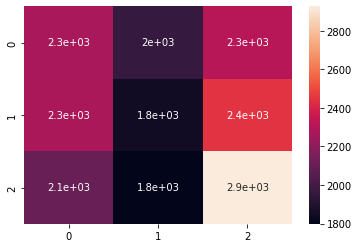

In [79]:
DT_cnf_matrix=confusion_matrix(y_test,DT_pred)
sns.heatmap(DT_cnf_matrix,annot=True)

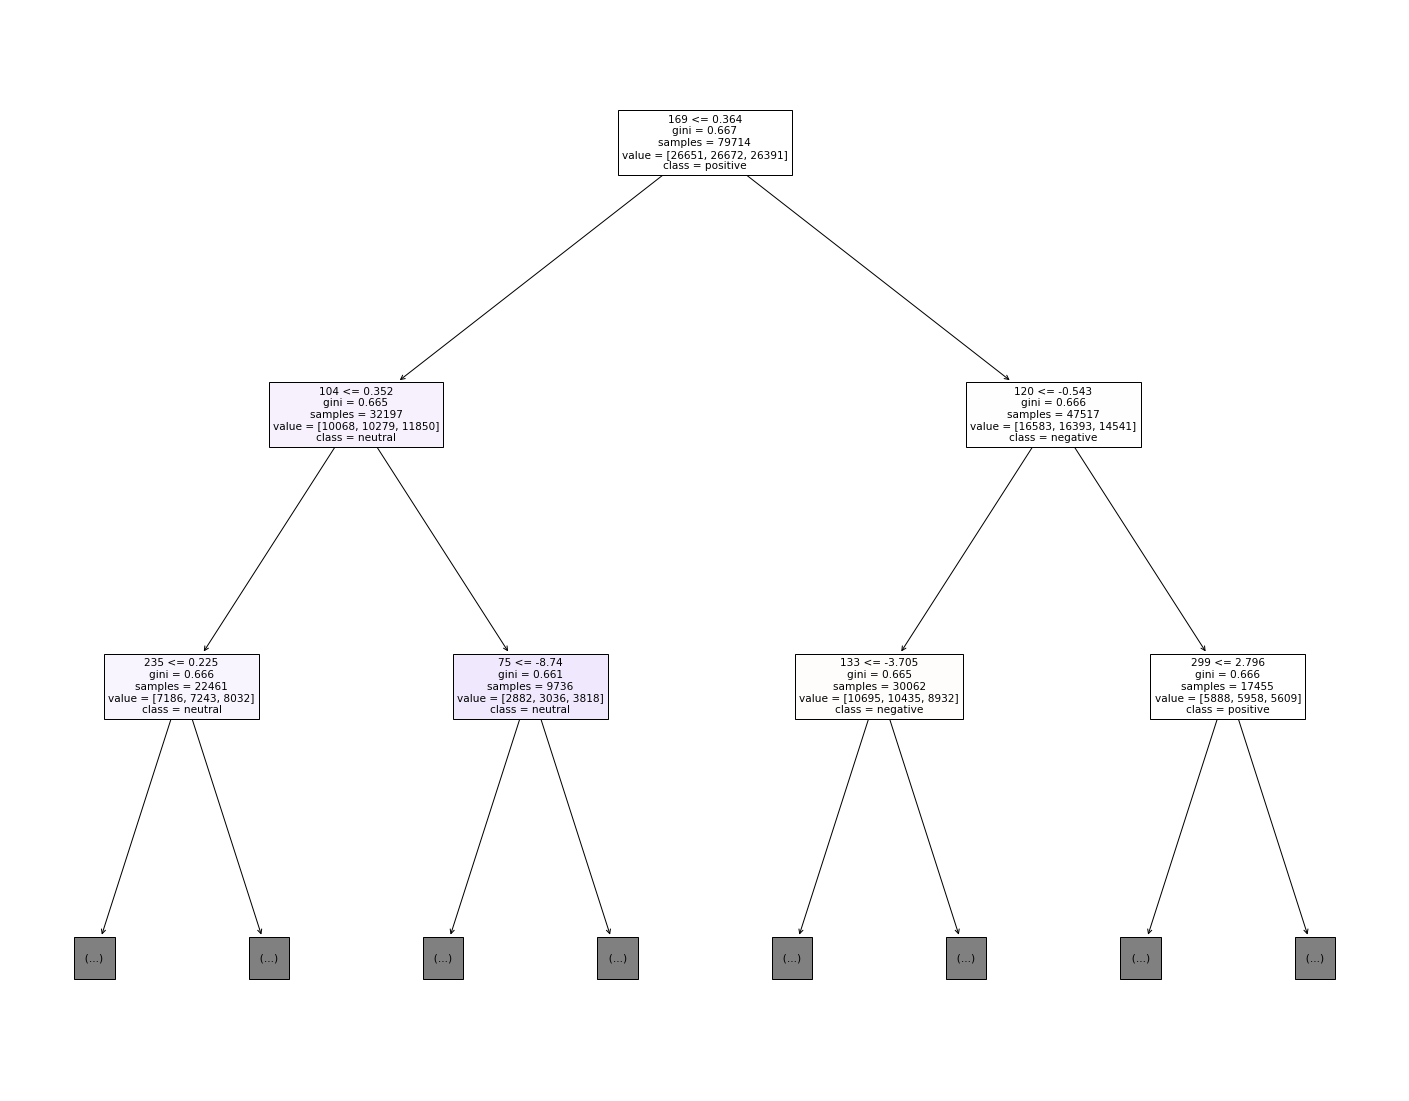

In [62]:
fig = plt.figure(figsize=(25,20))
plot_tree(DT_clf, max_depth=2, feature_names=x_test.columns, class_names=["negative", "positive", "neutral"], filled=True);

## Naive Bayes

In [66]:
NB_clf = GaussianNB().fit(x_train, y_train)
NB_pred = NB_clf.predict(x_test)

In [67]:
print(classification_report(y_test, NB_pred))

              precision    recall  f1-score   support

          -1       0.35      0.22      0.27      6534
           0       0.33      0.36      0.34      6569
           1       0.38      0.48      0.42      6826

    accuracy                           0.35     19929
   macro avg       0.35      0.35      0.34     19929
weighted avg       0.35      0.35      0.35     19929



<AxesSubplot:>

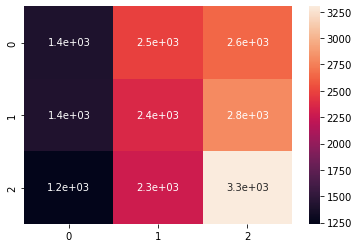

In [69]:
NV_cnf_matrix=confusion_matrix(y_test,NV_pred)
sns.heatmap(NV_cnf_matrix,annot=True)

## Neural Network

In [70]:
NN_clf_stop = MLPClassifier(random_state=33, max_iter=30, hidden_layer_sizes=(16,16), tol=1e-5, early_stopping=True, learning_rate_init=0.01)
NN_clf_stop.fit(x_train, y_train)
NN_pred_stop = NN_clf_stop.predict(x_test)

In [71]:
print(classification_report(y_test, NN_pred_stop))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      6534
           0       0.33      1.00      0.50      6569
           1       0.00      0.00      0.00      6826

    accuracy                           0.33     19929
   macro avg       0.11      0.33      0.17     19929
weighted avg       0.11      0.33      0.16     19929



<AxesSubplot:>

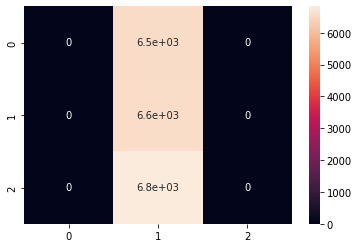

In [72]:
NN_cnf_matrix=confusion_matrix(y_test,NN_pred_stop)
sns.heatmap(NN_cnf_matrix,annot=True)

## Support Vector Machine (SVM)

In [73]:
SGD_SVM_clf = make_pipeline(StandardScaler(with_mean=False), SGDClassifier(max_iter=500, tol=1e-3,))
SGD_SVM_clf.fit(x_train, y_train)
SGD_SVM_pred = SGD_SVM_clf.predict(x_test)


In [74]:
print(classification_report(y_test, SGD_SVM_pred))

              precision    recall  f1-score   support

          -1       0.32      0.39      0.35      6534
           0       0.00      0.00      0.00      6569
           1       0.34      0.61      0.44      6826

    accuracy                           0.34     19929
   macro avg       0.22      0.33      0.26     19929
weighted avg       0.22      0.34      0.27     19929



<AxesSubplot:>

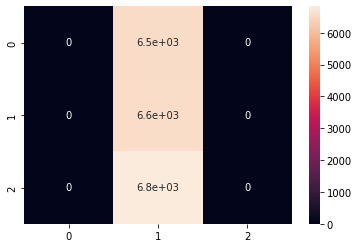

In [75]:
SVM_cnf_matrix=confusion_matrix(y_test,NN_pred_stop)
sns.heatmap(SVM_cnf_matrix,annot=True)

## Logistic Regression

In [76]:
LR_clf = LogisticRegression(max_iter=1000,solver='saga')
LR_clf.fit(x_train,y_train)
LR_pred=LR_clf.predict(x_test)


In [77]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

          -1       0.34      0.28      0.31      6534
           0       0.33      0.35      0.34      6569
           1       0.38      0.42      0.40      6826

    accuracy                           0.35     19929
   macro avg       0.35      0.35      0.35     19929
weighted avg       0.35      0.35      0.35     19929



<AxesSubplot:>

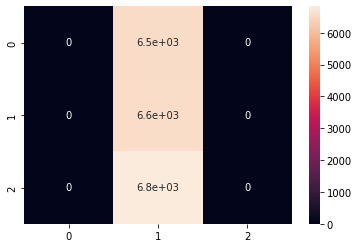

In [78]:
LR_cnf_matrix=confusion_matrix(y_test,NN_pred_stop)
sns.heatmap(LR_cnf_matrix,annot=True)